In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import nonlinear_QM_FPJPA as Fs
import wx_programs as wx
import bnc
from generator import *
from hardware_config import *
from values import *
from qubit_class import *
import standard_sequences.pinopi as pnp
import daq_programs_homo as daq
import standard_sequences.spectroscopy as spec
import standard_sequences.rabi as rabi
import analysis

In [2]:
wx_addr = wx.get_wx_address()
main_directory = r"C:\Users\quantum1\Documents"
save_dir = rf"{main_directory}\Python Scripts\Important Blue Fridge Python Files\New\nonlinear_QM\data"
ROIF1 = q1_dict["ro_freq"] - readout_dict["RO_LO"]
ROIF2 = q2_dict["ro_freq"] - readout_dict["RO_LO"]
target_bnc_address_6 = "USB0::0x03EB::0xAFFF::411-433500000-0753::INSTR"
bnc.set_bnc_output(
    general_vals_dict["qubit_bnc"], power_dBm=13, bnc_addr=target_bnc_address_6
)
q1 = Qubit(q1_dict)
q2 = Qubit(q2_dict)
readout = Readout(readout_dict)
type(readout.ro_dur)
IQ_angle_q1 = 240
IQ_angle_q2 = 220
num_steps = 101
reps = 1000
qubit_1_thr = [-5000, 5000]
qubit_2_thr = [-5000, 5000]
sweep_time = 200

In [3]:
q1

Qubit(ge_ssm=-0.11, ef_ssm=-0.2525, ef_time=39, qubit_id=q1, ge_amp=1.2, ro_freq=6.7275, ge_time=28)

In [4]:
rabi.rabi_ge(q1, q2, readout, num_steps=51, sweep_time=sweep_time, mixer_offset=0)

writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 51
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
0, No error
0, No error


In [5]:
# pnp.pipi_pi_nopi(0, 0, q1, readout, general_vals_dict, save_dir)
# pnp.pipi_pi_nopi(1, 1, q1, readout, general_vals_dict, save_dir)
# spec.spectroscopy_ef(q1,readout, general_vals_dict,save_dir,ssm_start=-0.15,ssm_stop = -0.25,spec_amp = 0.5, ROIF1 = ROIF1, ROIF2  =ROIF2)

0, No error
0, No error
0, No error
Patterns: 101
Records per pattern: 1000
Buffers per acquistion: 33
DAQ samples per pattern: 8192
0, No error
Capturing 33 buffers. Press <enter> to abort
Capture completed in 12.855123 sec
Captured 33 buffers (2.567070 buffers per sec)
Captured 101376 records (7886.038870 records per sec)
Transferred 1660944384 bytes (129204860.850915 bytes per sec)


<Figure size 800x800 with 0 Axes>

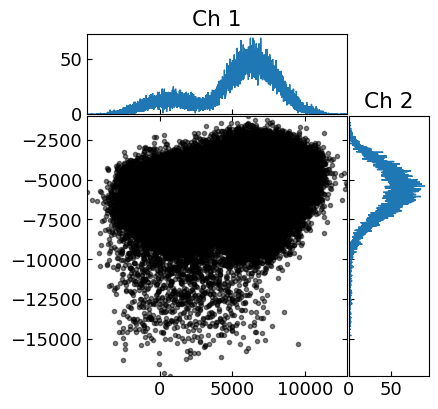

<Figure size 800x800 with 0 Axes>

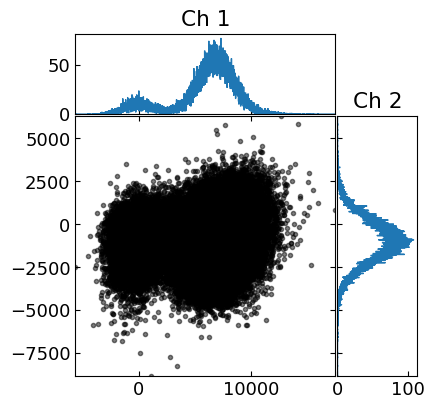

In [6]:
wx.wx_set_and_amplitude_and_offset(
    amp=general_vals_dict["wx_amps"], offset=general_vals_dict["wx_offs"]
)
# (
#     n_vs_pats_1,
#     n_vs_pats_2,
#     rec_avg_all,
#     rec_all,
#     rec_readout_1,
#     rec_readout_2,
#     rec_avg_vs_pats_1,
#     rec_avg_vs_pats_2,
#     rec_all_het_1,
#     rec_all_het_2,
#     bins_1,
#     bins_2,
#     counts_1,
#     counts_2,
#     prob_vs_pats_1,
#     prob_vs_pats_2,
#     n_readout_1,
#     n_readout_2,
#     rec_readout_vs_pats_1,
#     rec_readout_vs_pats_2,
# ) = daq.run_daq_het_2q(
#     ROIF1,
#     ROIF2,
#     deg_1=IQ_angle_q1,
#     deg_2=IQ_angle_q2,
#     num_patterns=num_steps,
#     num_records_per_pattern=reps,
#     ro_dur=readout.ro_dur,
#     qubit_1_thr=qubit_1_thr,
#     qubit_2_thr=qubit_2_thr,
#     verbose=True,
(
    n_vs_pats_1,
    n_vs_pats_2,
    rec_avg_all,
    rec_all,
    rec_readout_1,
    rec_readout_2,
    rec_avg_vs_pats_1,
    rec_avg_vs_pats_2,
    rec_all_het_1,
    rec_all_het_2,
    bins_1,
    bins_2,
    counts_1,
    counts_2,
    prob_vs_pats_1,
    prob_vs_pats_2,
    n_readout_1,
    n_readout_2,
    rec_readout_vs_pats_1,
    rec_readout_vs_pats_2,
) = daq.run_daq_het_2q(
    ROIF1,
    ROIF2,
    deg_1=IQ_angle_q1,
    deg_2=IQ_angle_q2,
    num_patterns=num_steps,
    num_records_per_pattern=reps,
    ro_dur=readout.ro_dur,
    qubit_1_thr=qubit_1_thr,
    qubit_2_thr=qubit_2_thr,
    verbose=True,
)

Qubit 1


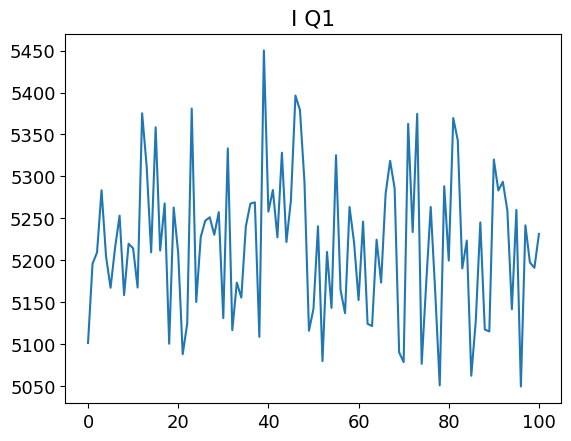

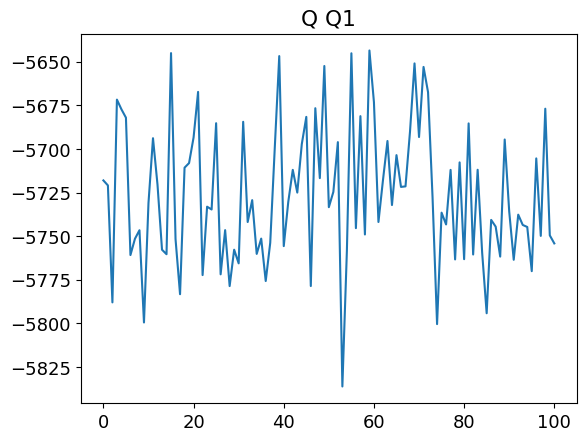

In [7]:
print("Qubit 1")
P_Q1 = prob_vs_pats_1[0]
# plt.plot(P_Q1);plt.title('Q1 thresholded');plt.show()
I_Q1 = rec_avg_vs_pats_1[0]
Q_Q1 = rec_avg_vs_pats_1[1]

plt.plot(I_Q1)
plt.title("I Q1")
plt.show()
plt.plot(Q_Q1)
plt.title("Q Q1")
plt.show()

Qubit 2


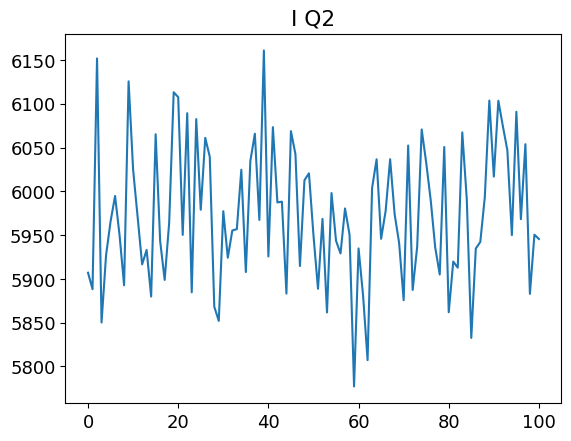

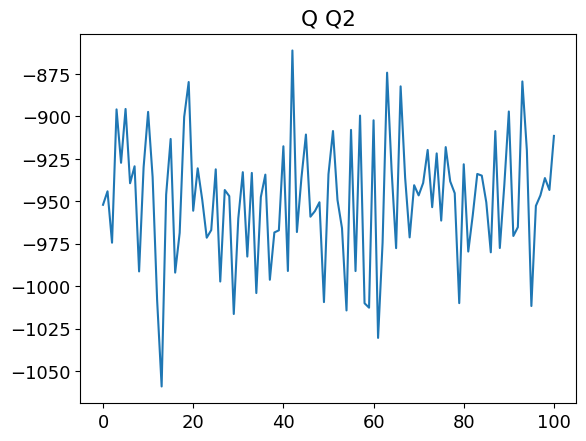

In [8]:
print("Qubit 2")
P_Q2 = prob_vs_pats_2[0]
# plt.plot(P_Q1);plt.title('Q1 thresholded');plt.show()
I_Q2 = rec_avg_vs_pats_2[0]
Q_Q2 = rec_avg_vs_pats_2[1]

plt.plot(I_Q2)
plt.title("I Q2")
plt.show()
plt.plot(Q_Q2)
plt.title("Q Q2")
plt.show()

In [9]:
Qrange = abs(np.max(Q) - np.min(Q))
Irange = abs(np.max(I) - np.min(I))
if Qrange > Irange:
    times = np.linspace(0, sweep_time / 1000, num_steps)
    pi_ge_fit_vals, _, _, _ = analysis.fit_sine_decay(
        times, Q, guess_vals=[11, 0.3, np.abs(np.max(Q) - np.min(Q)), 38, Q[0]]
    )
    pi_ge = abs((1 / 2 / pi_ge_fit_vals[0]) * 1000)
    print("\u03C0_ge time = {} ns".format(pi_ge))
else:
    times = np.linspace(0, sweep_time / 1000, num_steps)
    pi_ge_fit_vals, _, _, _ = analysis.fit_sine_decay(
        times, I, guess_vals=[11, 0.3, np.abs(np.max(I) - np.min(I)), 38, I[0]]
    )
    pi_ge = abs((1 / 2 / pi_ge_fit_vals[0]) * 1000)
    print("\u03C0_ge time = {} ns".format(pi_ge))

NameError: name 'Q' is not defined